## Data Source

As for the first part of OSEMN methodology, a relevant dataset is needed in order to proceed into the next step. We decided to obtain our dataset directly from Kaggle. Our Heart Attack Analysis & Prediction dataset can be retrieved from here: (https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("heart.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
print("\nNumber of rows: %d \nNumber of columns: %d" % (df.shape[0], df.shape[1]))
print("Column names: ", list(df.columns))


Number of rows: 303 
Number of columns: 14
Column names:  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# obtain the pairwise correlation for all variables
cor_matrix = df.corr().abs()
display(cor_matrix)
# check if any pair of variables is highly correlated 
display(cor_matrix[(cor_matrix.iloc[:,:] >= 0.75) | (cor_matrix.iloc[:,:] <= -0.75)])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001,0.225439
sex,0.098447,1.000000,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041,0.280937
cp,0.068653,0.049353,1.000000,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736,0.433798
trtbps,0.279351,0.056769,0.047608,1.000000,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210,0.144931
chol,0.213678,0.197912,0.076904,0.123174,1.000000,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803,0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019,0.028046
restecg,0.116211,0.058196,0.044421,0.114103,0.151040,0.084189,1.000000,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981,0.137230
thalachh,0.398522,0.044020,0.295762,0.046698,0.009940,0.008567,0.044123,1.000000,0.378812,0.344187,0.386784,0.213177,0.096439,0.421741
exng,0.096801,0.141664,0.394280,0.067616,0.067023,0.025665,0.070733,0.378812,1.000000,0.288223,0.257748,0.115739,0.206754,0.436757
oldpeak,0.210013,0.096093,0.149230,0.193216,0.053952,0.005747,0.058770,0.344187,0.288223,1.000000,0.577537,0.222682,0.210244,0.430696


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trtbps,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalachh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
exng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


No redundancy found

In [ ]:
# Creating function for outlier check
def outlier_check(var):
    sns.displot(data = df, x = var)
    print('Variable: ', var) 
    print('Minimum value: ', df[var].min())
    print('1st percentile: ', df[var].quantile(0.01))
    print('99th percentile: ', df[var].quantile(0.99))
    print('Maximum value: ', df[var].max())

# Outlier treatment, sets minimum value to 1st percentile or maximum value to 99th percentile.
def outlier_treatment(var, min_treat, max_treat):
    min = df[var].quantile(0.01)
    max = df[var].quantile(0.99)
    if min_treat == 1:
        df.loc[df[var] <= min, var] =  min
    if max_treat == 1:
        df.loc[df[var] >= max, var] =  max

Variable:  age
Minimum value:  29
1st percentile:  35.0
99th percentile:  71.0
Maximum value:  77


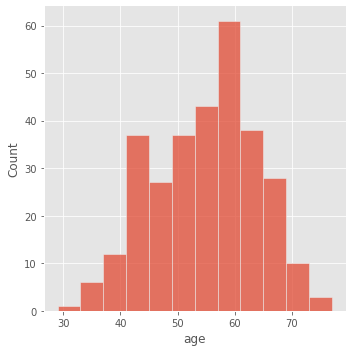

In [ ]:
outlier_check('age')
outlier_treatment('age', min_treat = 1, max_treat = 0)

Variable:  age
Minimum value:  35
1st percentile:  35.0
99th percentile:  71.0
Maximum value:  77


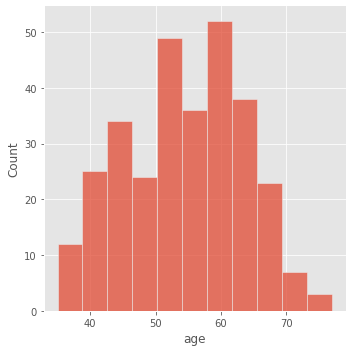

In [ ]:
outlier_check('age')

Variable:  trtbps
Minimum value:  94
1st percentile:  100.0
99th percentile:  180.0
Maximum value:  200


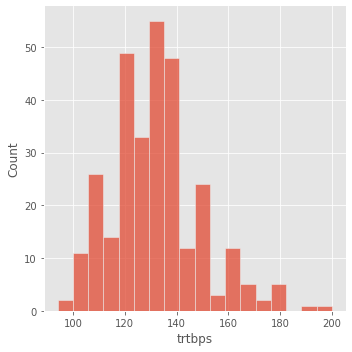

In [ ]:
outlier_check('trtbps')
outlier_treatment('trtbps', min_treat = 1, max_treat = 1)

Variable:  trtbps
Minimum value:  100
1st percentile:  100.0
99th percentile:  180.0
Maximum value:  180


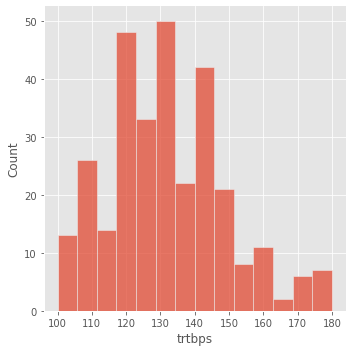

In [ ]:
outlier_check('trtbps')

Variable:  chol
Minimum value:  126
1st percentile:  149.0
99th percentile:  406.74000000000024
Maximum value:  564


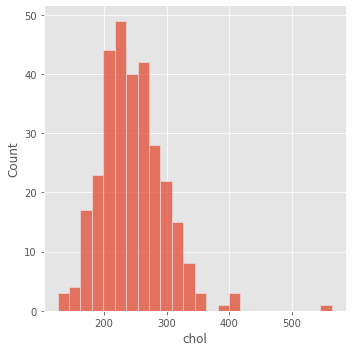

In [ ]:
outlier_check('chol')
outlier_treatment('chol', min_treat = 0, max_treat = 1)

Variable:  chol
Minimum value:  126.0
1st percentile:  149.0
99th percentile:  406.4852000000005
Maximum value:  406.74000000000024


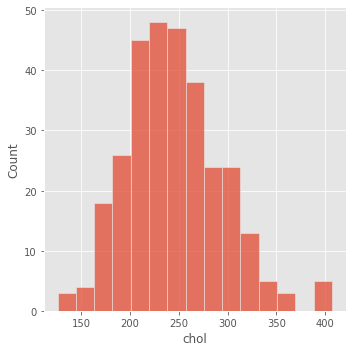

In [ ]:
outlier_check('chol')

Variable:  thalachh
Minimum value:  71
1st percentile:  95.02
99th percentile:  191.96000000000004
Maximum value:  202


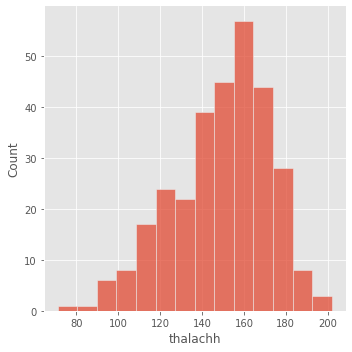

In [ ]:
outlier_check('thalachh')
outlier_treatment('thalachh', min_treat = 1, max_treat = 0)

Variable:  thalachh
Minimum value:  95.02
1st percentile:  95.0396
99th percentile:  191.96000000000004
Maximum value:  202.0


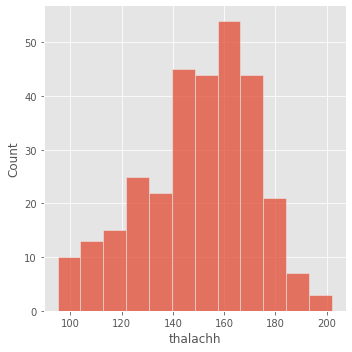

In [ ]:
outlier_check('thalachh')

Variable:  oldpeak
Minimum value:  0.0
1st percentile:  0.0
99th percentile:  4.2
Maximum value:  6.2


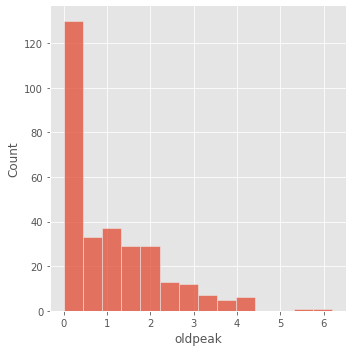

In [ ]:
outlier_check('oldpeak')
outlier_treatment('oldpeak', min_treat = 0, max_treat = 1)

Variable:  oldpeak
Minimum value:  0.0
1st percentile:  0.0
99th percentile:  4.2
Maximum value:  4.2


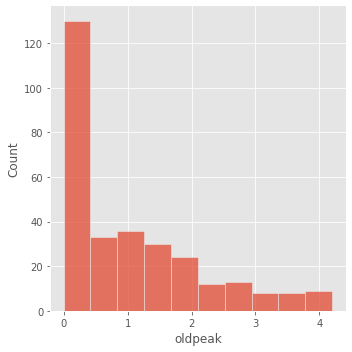

In [ ]:
outlier_check('oldpeak')

   Count  Percentage
1    165       54.46
0    138       45.54


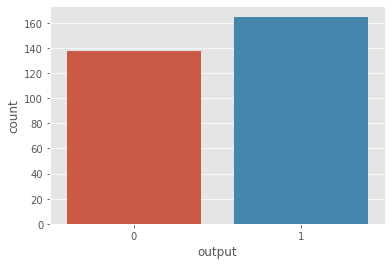

In [ ]:
sns.countplot(df['output'])
print(pd.concat( [df['output'].value_counts(),
                  df['output'].value_counts(normalize=True).mul(100).round(2)],
                 axis = 1,
                 keys = ('Count', 'Percentage')))

## EDA

In [ ]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,pressure,cholesterol,fbs,re,rate,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','re','slp','thall']
con_cols = ["age","pressure","cholesterol","rate","oldpeak"]
target_col = ["output"]

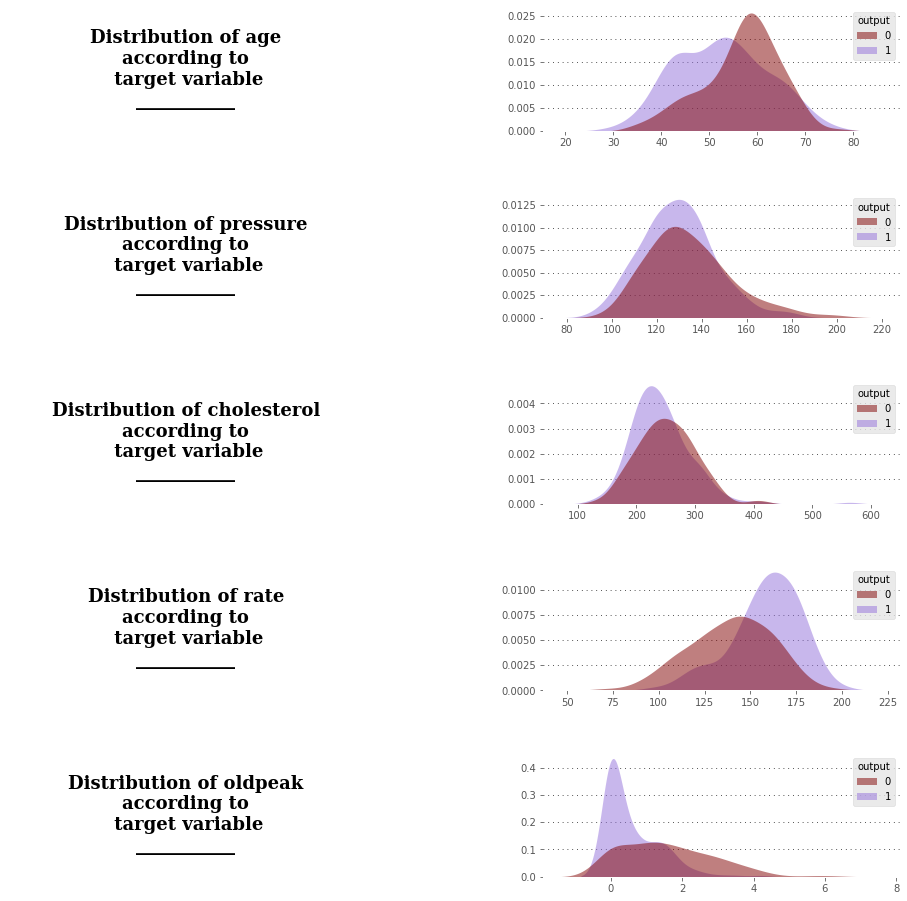

In [ ]:
fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#FFFFFF"
color_palette = ["#5833ff","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
# TrTbps title pressure
ax2.text(0.5,0.5,"Distribution of pressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='pressure',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")
# Chol title
ax4.text(0.5,0.5,"Distribution of cholesterol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='cholesterol',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")
# Thalachh title
ax6.text(0.5,0.5,"Distribution of rate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# rate 
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='rate',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#800000","#9370DB"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

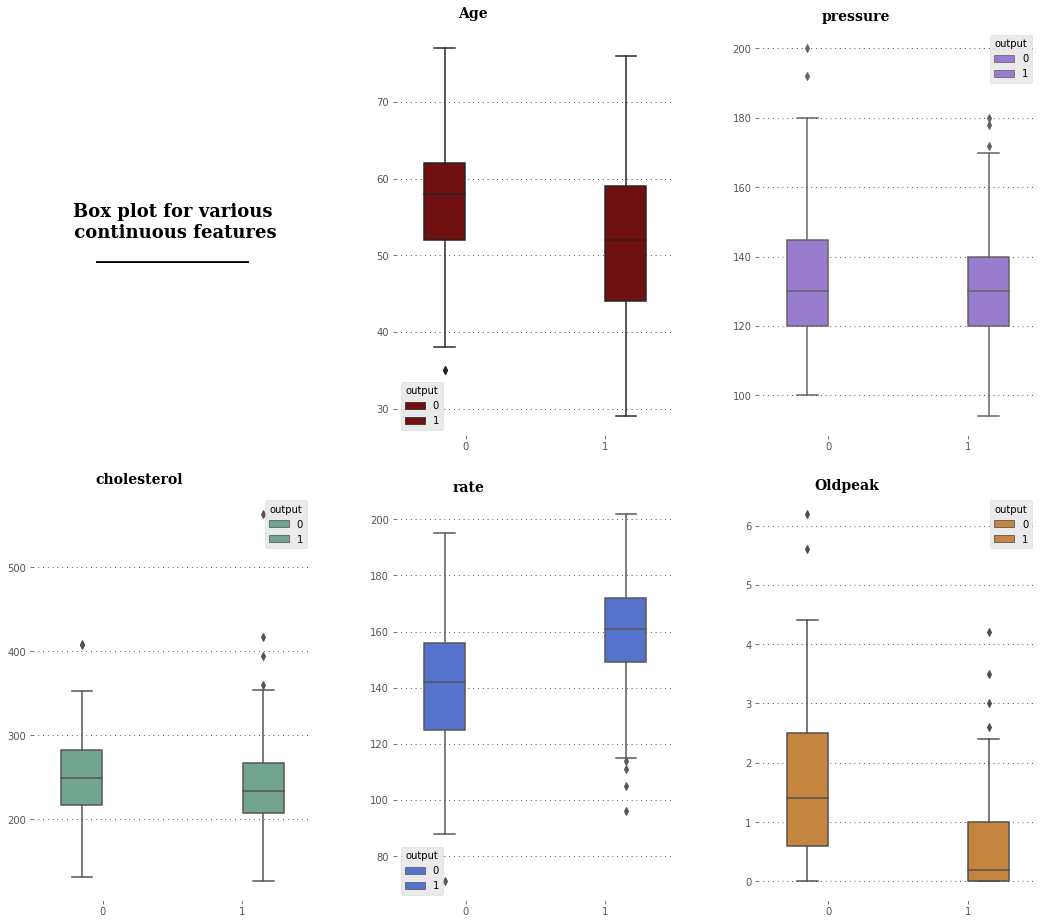

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,x='output',y='age',data=df,hue=df['output'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
ax2.text(-0.05, 208, 'pressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,x='output',y='pressure',data=df,hue=df['output'],palette=["#9370DB"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
ax3.text(-0.05, 600, 'cholesterol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,x='output',y='cholesterol',data=df,hue=df['output'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# rate  
ax4.text(-0.09, 210, 'rate', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax4,x='output',y='rate',data=df,hue=df['output'],palette=["#4169E1"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")
# oldpeak 
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax5,x='output',y='oldpeak',data=df,hue=df['output'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

There are certain outliers in all the continuous features.  

It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of age, it is evident that this isn't the case.   

In the Trtbps and Chol plots, the distribution of people with less chance of heart attack and more chance is similar.

According to the distribution plot of thalachh, people with higher maximum heart rate achieved have higher chances of heart attack.   

According to the distribution plot of oldpeak, people with lower pevious peak achieved have higher chances of heart attack. 


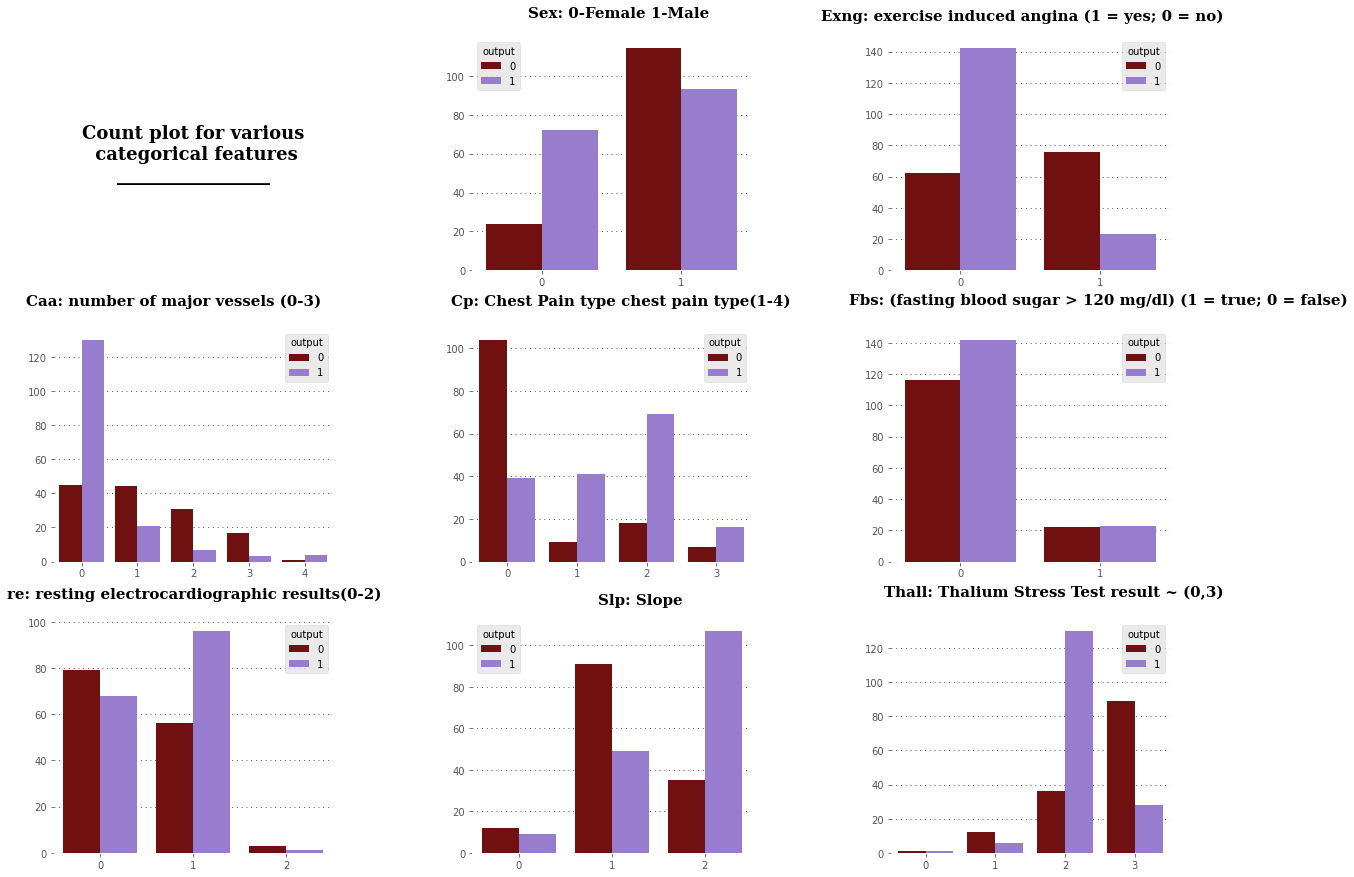

In [ ]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(-0.1, 130, 'Sex: 0-Female 1-Male', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',hue='output',fill= True,palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(-1, 160, 'Exng: exercise induced angina (1 = yes; 0 = no)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',hue='output',fill= True,palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(-1.0, 150, 'Caa: number of major vessels (0-3)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',hue='output',fill= True,palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count,
ax4.text(-0.8, 120, 'Cp: Chest Pain type chest pain type(1-4)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',hue='output',fill= True,palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(-0.8, 165, 'Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',hue='output',fill= True,palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(-1.0, 110, 're: resting electrocardiographic results(0-2)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='re',hue='output',fill= True,palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 120, 'Slp: Slope', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',hue='output',fill= True,palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(-0.6, 150, 'Thall: Thalium Stress Test result ~ (0,3)', fontsize=15, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',hue='output',fill= True,palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

People with sex = 1 (Male) have higher chance of heart attack.  

People with no exercise induced angina, that is with exng = 0 have higher chance of heart attack.

People with 0 major vessels, that is with caa = 0 have high chance of heart attack. 

The cp plot tells about the following, people with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.  

The fbs plot indicates that people with fasting blood sugar < 120 mg/dl are more likely to get heart attack.

The Slp graph shows that when slope=2, the chance of heart disease is higher

People with thall = 2 have much higher chance of 
heart attack.  


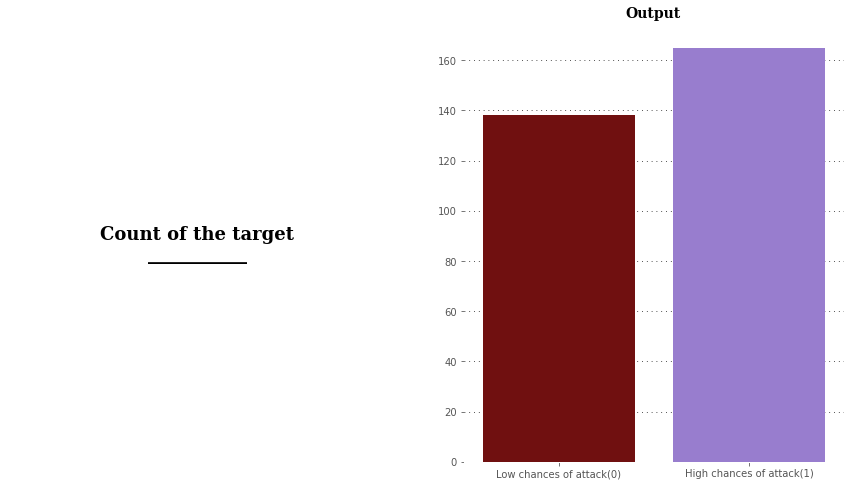

In [ ]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#9370DB","#6aac90","#4169E1","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

In [ ]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,pressure,cholesterol,rate,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
pressure,0.279351,1.000000,0.123174,-0.046698,0.193216
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952
rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


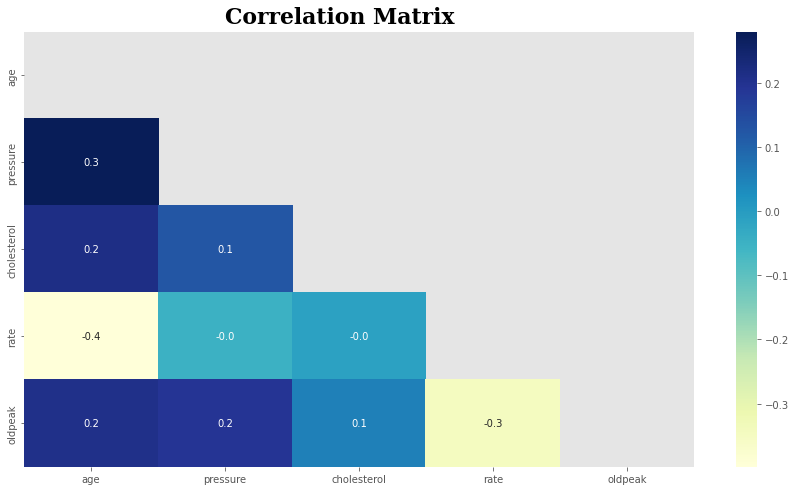

In [ ]:
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

#color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

There is no apparent linear correlation between continuous variable according to the heatmap.

<Figure size 864x864 with 0 Axes>

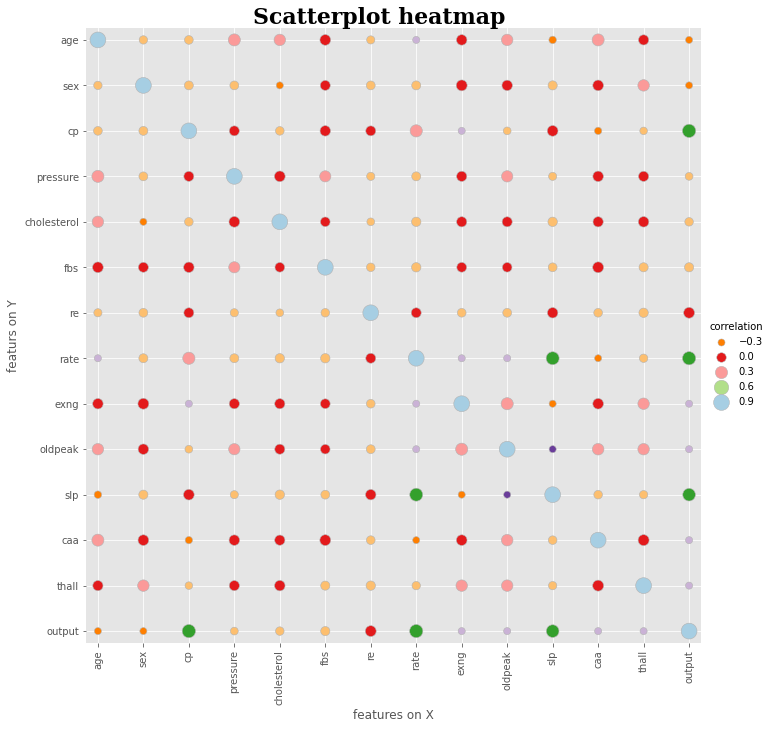

In [ ]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="Paired_r", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

The scatterplot heatmap matrix suggests that there might be some correlation between output and cp, thalachh and slp. 